Nama: David Jonathan Tjong  
NIM: 2211016310007

# Explatory Data Analysis

- Melihat distribusi data dan pola antar fitur
- Identifikasi outlier, missing values, dan pola pada dataset

Mengimport dataset

In [126]:
import pandas as pd

# mengimport dataset
df = pd.read_csv("datauts.csv")
# melihat informasi data, missing value, dan statistik data
df.info(), df.head(5), df.isnull().sum(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dengue     514 non-null    int64  
 1   age2       514 non-null    int64  
 2   sex        514 non-null    int64  
 3   ast        514 non-null    int64  
 4   alt        514 non-null    int64  
 5   wbc        514 non-null    int64  
 6   lymph      514 non-null    int64  
 7   albumin    514 non-null    float64
 8   max_hct    514 non-null    float64
 9   platelets  514 non-null    int64  
 10  tourn_no   514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


(None,
    dengue  age2  sex  ast  alt   wbc  lymph  albumin  max_hct  platelets  \
 0       1     6    0   25   10  3600     16      4.5     42.5     271000   
 1       1     2    0   38   14  7200     21      5.6     38.0     272000   
 2       0     2    1   27    9  9200     13      4.6     37.0     216000   
 3       1     4    1  167  109  2200     34      4.8     40.0     227000   
 4       1     3    0   29   13  9500      7      5.0     38.0     204000   
 
    tourn_no  
 0        21  
 1        21  
 2        10  
 3        21  
 4         5  ,
 dengue       0
 age2         0
 sex          0
 ast          0
 alt          0
 wbc          0
 lymph        0
 albumin      0
 max_hct      0
 platelets    0
 tourn_no     0
 dtype: int64,
            dengue        age2        sex          ast         alt  \
 count  514.000000  514.000000  514.00000   514.000000  514.000000   
 mean     0.607004    3.622568    0.48249    67.768482   33.538911   
 std      0.488892    1.567692    0.5

Melihat distribusi data dan pola antar fitur

<Figure size 1500x1000 with 0 Axes>

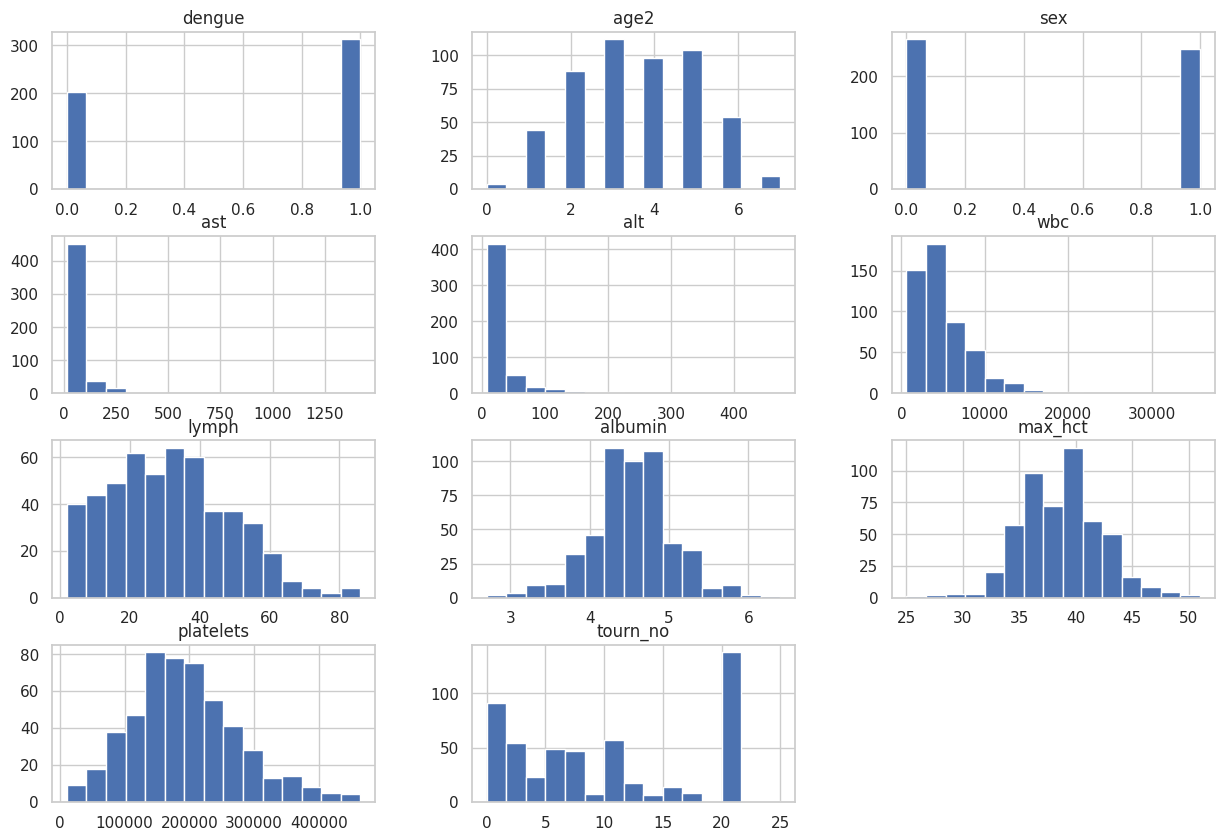



age2 adalah distribusi normal, nilai =0.0006145865159758359

ast adalah right skewed, nilai =8.81337430190415

alt adalah right skewed, nilai =5.491323579742115

wbc adalah right skewed, nilai =2.5790790924544207

lymph adalah distribusi normal, nilai =0.38794894297290167

albumin adalah distribusi normal, nilai =-0.05778928332956927

max_hct adalah distribusi normal, nilai =0.10750512678795805

platelets adalah right skewed, nilai =0.5343374897529994

tourn_no adalah distribusi normal, nilai =0.3165957140394329



In [127]:
import matplotlib.pyplot as plt

# histogram untuk berbagai fitur untuk melihat distribusi frekuensinya
plt.figure(figsize=(15, 10))
df.hist(bins=15, figsize=(15, 10))
plt.show()

# mencek lebih pasti apakah skewness atau distribusi normal
print('\n')
skew_to_plot = ['age2', 'ast', 'alt', 'wbc', 'lymph', 'albumin', 'max_hct', 'platelets', 'tourn_no']
for i in skew_to_plot:
  nilai = df[i].skew()
  if abs(nilai<0.5):
    # jika mendekati 0 maka merupakan distribusi normal
     print(f'{i} adalah distribusi normal, nilai ={nilai}\n')
  elif nilai>0:
    print(f'{i} adalah right skewed, nilai ={nilai}\n')
  else:
    print(f'{i} adalah left skewed, nilai ={nilai}\n')

# dapat disimpulkan jika
# distribusi normal = age2, albumin, max_hct, lymph, tourn_no
# right skewed histogram = ast, alt, wbc, platelets

Melihat pola antar fitur

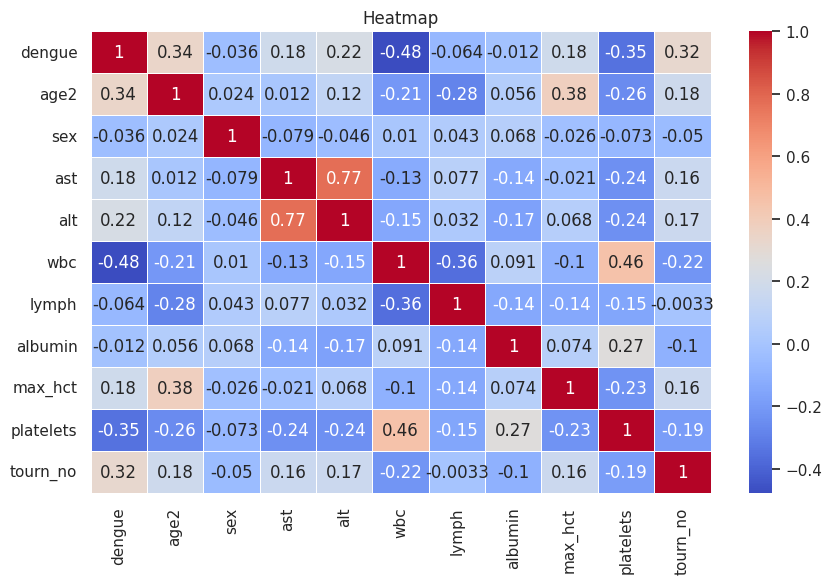

In [128]:
import seaborn as sns

# heatmap antar fitur untuk mencek korelasinya
plt.figure(figsize=(10, 6))
plt.title('Heatmap')
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

# Preprocessing Data
- Transformasi data jika menggunakan knn

In [135]:
import numpy as np
# tidak terlihat adanya missing value
# transformasi data untuk uji knn

# untuk right skew data biasanya digunakan square root, cube root, and log (saya pakai log)
# kemudian memakai standard scaller

# buat copy dataset
dataNew= df.copy()

# transformasi right skew (untuk nilai skew yang terlalu jauh) untuk mendekatkan ke distribusi normal
dataNew['ast'] = np.log(dataNew['ast'])
dataNew['alt'] = np.log(dataNew['alt'])
dataNew['wbc'] = np.log(dataNew['wbc'])

# cek data hasil transformasi
dataNew.head(5)

,dengue,age2,sex,ast,alt,wbc,lymph,albumin,max_hct,platelets,tourn_no
0,1,6,0,3.218876,2.302585,8.188689,16,4.5,42.5,271000,21
1,1,2,0,3.637586,2.639057,8.881836,21,5.6,38.0,272000,21
2,0,2,1,3.295837,2.197225,9.126959,13,4.6,37.0,216000,10
3,1,4,1,5.117994,4.691348,7.696213,34,4.8,40.0,227000,21
4,1,3,0,3.367296,2.564949,9.159047,7,5.0,38.0,204000,5


In [136]:
# cek nilai right skew sebelumnya dan bandingkan
print(dataNew['ast'].skew())
print(dataNew['alt'].skew())
print(dataNew['wbc'].skew())

# hasilnya lebih mendekati distribusi normal

1.4667936347195636
1.3929141705977304
0.203921788372295


In [131]:
# kemudian pisahkan data train dan testing lalu lakukan standard scaller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dari label kelas
y2 = dataNew["dengue"]
X2 = dataNew.drop("dengue", axis=1)

# Bagi data menjadi 80% training data dan 20% test data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Lakukan normalisasi fitur numerik (wajib untuk KNN mengandalkan perhitungan jarak)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ini dipakai JIKA ingin menguji knn

# Pembuatan Model Klasifikasi dan Penggunaan Metode Evaluasi

In [132]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# membadingkan penggunaan algoritma Naive Bayes, Decision Tree, dan Random Forest menggunakan crossvalidaton

# Pisahkan fitur dari label kelas
y = df["dengue"]
X = df.drop("dengue", axis=1)

# List classifier untuk perbandingan
classifiers = {'Naive Bayes': GaussianNB(),
               'Decision Tree': DecisionTreeClassifier(random_state=42),
               'Random Forest': RandomForestClassifier(random_state=42)
              }

# menentukan nilai metric tiap loop
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score),
    'specificity': make_scorer(recall_score, pos_label=0),
    'f1': make_scorer(f1_score)
}

# Evaluasi pada seluruh dataset menggunakan 10-fold CV untuk masing-masing classifier
for clf_name, clf in classifiers.items():
    # 10-fold CV dengan berbagai metrik
    scores = cross_validate(clf, X, y, cv=10, scoring=scoring)
    # Laporkan rata-rata dari tiap metrik
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision'].mean()
    recall = scores['test_recall'].mean()
    specificity = scores['test_specificity'].mean()
    f1 = scores['test_f1'].mean()
    auc = scores['test_roc_auc'].mean()
    # Laporan hasil CV untuk masing-masing classifier
    print(f"\nHasil CV untuk {clf_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")


# hasil terbaik didapatkan oleh random forest


Hasil CV untuk Naive Bayes:
Accuracy: 0.7612
Precision: 0.8518
Recall: 0.7475
Specificity: 0.7814
F1-Score: 0.7831
AUC: 0.7645

Hasil CV untuk Decision Tree:
Accuracy: 0.7319
Precision: 0.7782
Recall: 0.7857
Specificity: 0.6479
F1-Score: 0.7774
AUC: 0.7168

Hasil CV untuk Random Forest:
Accuracy: 0.8057
Precision: 0.8397
Recall: 0.8468
Specificity: 0.7421
F1-Score: 0.8390
AUC: 0.7945


mencoba menggunakan algoritma knn

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#tuning k pada knn dengan train-validation set
k_values = [3, 5, 7, 9, 11, 13,15,17,19,21,23]  # nilai k yang ingin diteliti
cv_accuracy_results = {}  # menyimpan hasil cross-validation berdasarkan akurasi

print("Accuracy for different k values during 10-fold CV:")

# akan dilakukan train-test split yang distandard scaler kemudian dilakukan 10-fold cv
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 10-fold CV hanya dengan akurasi
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    # Simpan hasil rata-rata akurasi untuk tiap k
    cv_accuracy_results[k] = np.mean(scores)
    # Print akurasi untuk setiap k
    print(f"k={k}: Mean CV Accuracy = {np.mean(scores):.4f}")

# Cari k terbaik (dengan akurasi tertinggi)
best_k = max(cv_accuracy_results, key=cv_accuracy_results.get)
print(f"\nK terbaik berdasar 10-fold CV (Accuracy): {best_k}")

# Nilai k terbaik diuji menggunakan data testing

# Buat model dengan k terbaik yang berdasarkan train-test split
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Prediksi pada test set
y_pred_test = knn_best.predict(X_test_scaled)

# Confusion matrix untuk menghitung specificity
cm = confusion_matrix(y_test, y_pred_test)

# Test metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
test_f1 = f1_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_test)

# Laporan testing
print(f"\nLaporan testing (Best k={best_k}):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Specificity: {test_specificity:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"AUC: {test_auc:.4f}")

# didapatkan hasil terbaik untuk knn dengan k=21

Accuracy for different k values during 10-fold CV:
k=3: Mean CV Accuracy = 0.7569
k=5: Mean CV Accuracy = 0.7689
k=7: Mean CV Accuracy = 0.7760
k=9: Mean CV Accuracy = 0.7810
k=11: Mean CV Accuracy = 0.7761
k=13: Mean CV Accuracy = 0.7810
k=15: Mean CV Accuracy = 0.7761
k=17: Mean CV Accuracy = 0.7810
k=19: Mean CV Accuracy = 0.7858
k=21: Mean CV Accuracy = 0.7858
k=23: Mean CV Accuracy = 0.7859

K terbaik berdasar 10-fold CV (Accuracy): 23

Laporan testing (Best k=23):
Accuracy: 0.8252
Precision: 0.8333
Recall: 0.8871
Specificity: 0.7317
F1-Score: 0.8594
AUC: 0.8094


Jadi untuk pembuatan model terbaik, digunakan Random forest dengan hyperparameter tunning untuk n_estimator saja dengan GridSearchCV yang mencoba berbagai nilai n_estimator menggunakan 10-fold-cv. Kemudian dilakukan train-test split untuk mentest datanya dan hasilnya dituangkan ke dalam bentuk metrik evaluasi akurasi


Laporan testing (Best n_estimator={'n_estimators': 150}):
Accuracy: 0.8350
Precision: 0.8462
Recall: 0.8871
Specificity: 0.7561
F1-Score: 0.8661
AUC: 0.8216


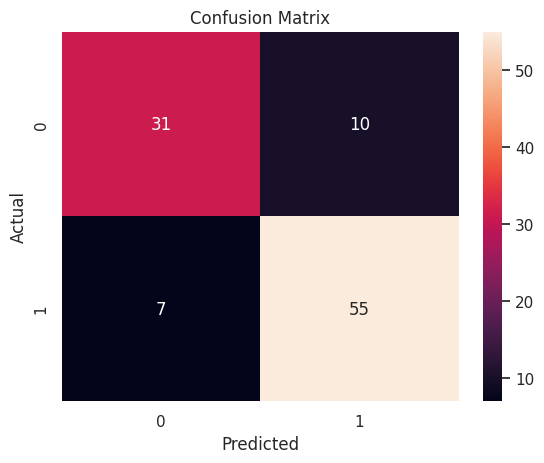

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

param_grid = {
    'n_estimators': [10, 25, 50, 100, 150, 200], # Berbagai varian nilai n_estimators
}

# Inisialisasi RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# ini split test X dan y yang tidak dilakukan scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# menentukan hyperparamater tunning dengan Grid Search
# GridSearchCV dengan 10-fold CV untuk mencoba berbagai n_estimator dan menentukan yang terbaik
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

# Menggunakan model terbaik hasil GridSearchCV
best_rf = grid_search.best_estimator_

# Evaluasi di test set
y_pred_test = best_rf.predict(X_test)

# Confusion matrix untuk menghitung specificity
cm = confusion_matrix(y_test, y_pred_test)

# Test metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
test_f1 = f1_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_test)

# Laporan testing
print(f"\nLaporan testing (Best n_estimator={grid_search.best_params_}):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Specificity: {test_specificity:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"AUC: {test_auc:.4f}")

# melihat confusion matrix
# mencek yang benar benar dengue diprediksi dengue
# mencek yang benar benar dengue diprediksi non-dengue
# mencek yang benar benar non-dengue diprediksi non-dengue
# mencek yang benar benar non-dengue diprediksi dengue
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()